# Positivity of quantum relative entropy

## Definition

The quantum relative entropy can be defined as

$D(\rho, \sigma) = \mathrm{tr}\,\rho (\log \rho - \log \sigma)$,

where $\rho$ and $\sigma$ are density matrices, satisfying $\rho^\dagger = \rho$, $\mathrm{tr}\,\rho = 1$ and the analogous relationships for $\sigma$.

## Initial steps

We choose eigenbases for $\rho$ and $\sigma$, $\{\mathbf{v}_i\}$ and $\{\mathbf{w}_j\}$, respectively. Both are orthogonal bases, as $\rho$ and $\sigma$ are Hermitian. Then we can express them and their functions as a sum of projection operators,

$\rho = \sum_i \rho_i \left|\mathbf{v}_i \rangle\langle \mathbf{v}_i \right|$

$\sigma = \sum_j \sigma_j \left|\mathbf{w}_j \rangle\langle \mathbf{w}_j \right|$.

Now the original expression can be rewritten as

$D(\rho, \sigma) = \mathrm{tr}\,\left(\sum_i \rho_i \left|\mathbf{v}_i \rangle\langle \mathbf{v}_i \right|\right) \left(\sum_j \log \rho_j \left|\mathbf{v}_j \rangle\langle \mathbf{v}_j \right| - \sum_k \log \sigma_k \left|\mathbf{w}_k \rangle\langle \mathbf{w}_k \right|\right)$

$ = \sum_l \left\langle \mathbf{v}_l \right| \,\left(\sum_i \rho_i \left|\mathbf{v}_i \rangle\langle \mathbf{v}_i \right|\right) \left(\sum_j \log \rho_j \left|\mathbf{v}_j \rangle\langle \mathbf{v}_j \right| - \sum_k \log \sigma_k \left|\mathbf{w}_k \rangle\langle \mathbf{w}_k \right|\right) \left| \mathbf{v}_l \right\rangle$.

By distributing and contracting, using the fact that $\{\mathbf{v}_i\}$ is an orthogonal basis,

$D(\rho, \sigma) = \sum_l \sum_i \sum_j \rho_i \log \rho_j \left\langle \mathbf{v}_l \mid \mathbf{v}_i \right\rangle\left\langle \mathbf{v}_i \mid \mathbf{v}_j \right\rangle\left\langle \mathbf{v}_j \mid \mathbf{v}_l \right\rangle - \sum_l \sum_i \sum_k \rho_i \log \sigma_k \left\langle \mathbf{v}_l \mid \mathbf{v}_i \right\rangle\left\langle \mathbf{v}_i \mid \mathbf{w}_k \right\rangle\left\langle \mathbf{w}_k \mid \mathbf{v}_l \right\rangle$

$ = \sum_l \sum_i \sum_j \rho_i \log \rho_j \delta_{li} \delta_{ij} \delta_{jl} - \sum_l \sum_i \sum_k \rho_i \log \sigma_k \delta_{li}\left\langle \mathbf{v}_i \mid \mathbf{w}_k \right\rangle\left\langle \mathbf{w}_k \mid \mathbf{v}_l \right\rangle$

$ = \sum_i \rho_i \log \rho_i - \sum_i \sum_k \rho_i \log \sigma_k \left\langle \mathbf{v}_i \mid \mathbf{w}_k \right\rangle\left\langle \mathbf{w}_k \mid \mathbf{v}_i \right\rangle$

$ = \sum_i \rho_i \log \rho_i - \sum_i \sum_k \rho_i \log \sigma_k \, \left|\left\langle \mathbf{w}_k \mid \mathbf{v}_i \right\rangle\right|^2$

$ = \sum_i \rho_i \log \rho_i - \sum_i \rho_i \sum_k  \left|\left\langle \mathbf{w}_k \mid \mathbf{v}_i \right\rangle\right|^2 \log \sigma_k$

## Ideas

It is not so clear how to proceed here. We know that

$\sum_k \left|\left\langle \mathbf{w}_k \mid \mathbf{v}_i \right\rangle\right|^2 = \sum_k \left\langle \mathbf{v}_i \mid \mathbf{w}_k \right\rangle\left\langle \mathbf{w}_k \mid \mathbf{v}_i \right\rangle$

and, using the fact that $\sum_k \left| \mathbf{w}_k \right\rangle \left\langle \mathbf{w}_k \right|$ is the identity,

$\sum_k \left|\left\langle \mathbf{w}_k \mid \mathbf{v}_i \right\rangle\right|^2 = \left\langle \mathbf{v}_i \mid \mathbf{v}_i \right\rangle$

$ = 1$,

but the sum in our problem is weighted by the values of $\log \sigma_k$.

It's also non obvious how to combine addition with logarithms, but maybe the unit sum makes "some type of averaging" take place. We can do some numerical experiments to try to see if it's plausible.

### Numerical experiments

In [6]:
import numpy as np
np.random.seed(1234)
def do_comparison(num_tries, num_coeffs, max_value):
    for i in range(num_tries):
        coeffs = np.random.random(size=num_coeffs)
        coeffs /= np.sum(coeffs)
        values = np.random.random(size=num_coeffs) * max_value
        avg_of_logs = np.sum(coeffs * np.log(values))
        log_of_avg = np.log(np.sum(coeffs * values))
        print avg_of_logs, log_of_avg
do_comparison(5, 10, 100)

3.60972651563 4.02047572679
4.04870045065 4.17022709276
3.44331402991 4.18030363426
3.64073267394 3.83489746741
3.78112254381 3.9972840142


The RHS seems to be bigger for some reason. Doing a more stringent numerical test:

In [11]:
np.random.seed(4321)
coeffs = np.random.random(size=(1000000, 10))
coeffs /= np.sum(coeffs, axis=1, keepdims=True)
values = np.random.random(size=(1000000, 10)) * 100
avgs_of_logs = np.sum(coeffs * np.log(values), axis=1)
logs_of_avgs = np.log(np.sum(coeffs * values, axis=1))
diffs = logs_of_avgs - avgs_of_logs
print np.min(diffs), np.max(diffs)

0.00292479134115 2.73141447699


Clearly positive, though the reason in unclear. Plotting the case of two values:

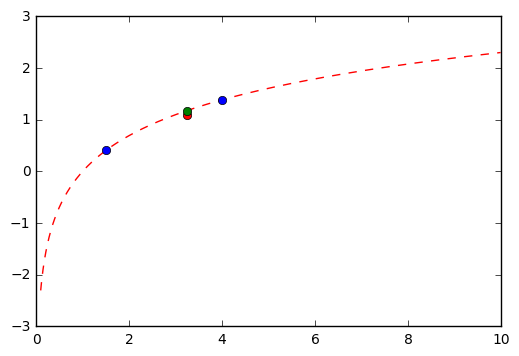

In [19]:
import matplotlib.pyplot as plt
x = np.arange(0.1, 10.0, 0.01)
points = np.array([1.5, 4])
coeffs = np.array([0.3, 0.7])
avg_of_pos = np.sum(coeffs * points, keepdims=True)
avg_of_logs = np.sum(coeffs * np.log(points), keepdims=True)
log_of_avgs = np.log(avg_of_pos)
plt.plot(x, np.log(x), 'r--', points, np.log(points), 'bo', avg_of_pos, avg_of_logs, 'ro', avg_of_pos, log_of_avgs, 'go')
plt.show()

It seems to be related to the convexity of the function, its second derivative being positive.

### Convexity

Let's try to prove then that given a set of positions $x_i$ and a set of non-negative weights $w_i$ such that $\sum_i w_i = 1$,

$\sum_i w_i \log x_i \le \log \sum_i w_i x_i$.

We can use the fact that we can built a convex combination of positions inductively, so let's start with the case of two values $x_1 < x_2$. Intuitively we can think of the difference as being due to all the higher slopes being between $x_1$ and $w_1 x_1 + w_2 x_2$, with strictly lower slopes afterwards. 

If we write that difference generically,

$f(w_1 x_1 + w_2 x_2) - \left(w_1 f(x_1) + w_2 f(x_2)\right) = f(x_1) + \int_{x_1}^{w_1 x_1 + w_2 x_2} dx\,f'(x) - w_1 f(x_1) - w_2 \left(f(x_1) + \int_{x_1}^{x_2} dx\,f'(x)\right)$

$ = f(x_1) + \int_{x_1}^{w_1 x_1 + w_2 x_2} dx\,f'(x) - w_1 f(x_1) - w_2 f(x_1) - w_2 \int_{x_1}^{x_2} dx\,f'(x)$

$ = \int_{x_1}^{w_1 x_1 + w_2 x_2} dx\,f'(x) - w_2 \int_{x_1}^{x_2} dx\,f'(x)$

$ = \int_{x_1}^{w_1 x_1 + w_2 x_2} dx\,f'(x) - w_2 \left(\int_{x_1}^{w_1 x_1 + w_2 x_2} dx\,f'(x) + \int_{w_1 x_1 + w_2 x_2}^{x_2} dx\,f'(x)\right)$

$ = w_1 \int_{x_1}^{w_1 x_1 + w_2 x_2} dx\,f'(x) - w_2 \int_{w_1 x_1 + w_2 x_2}^{x_2} dx\,f'(x)$.

By using the mean value theorem for definite integrals, we know we have $x_A$ and $x_B$ such that

$x_1 \le x_A \le w_1 x_1 + w_2 x_2 \le x_B \le x_2$,

$\int_{x_1}^{w_1 x_1 + w_2 x_2} dx\,f(x) = (w_1 x_1 + w_2 x_2 - x_1) f'(x_A)$ and

$\int_{w_1 x_1 + w_2 x_2}^{x_2} dx\,f(x) = (x_2 - w_1 x_1 + w_2 x_2) f'(x_B)$.

Replacing:

$f(w_1 x_1 + w_2 x_2) - \left(w_1 f(x_1) + w_2 f(x_2)\right) = w_1 (w_1 x_1 + w_2 x_2 - x_1) f'(x_A) - w_2 (x_2 - w_1 x_1 - w_2 x_2) f'(x_B)$

$ = w_1 (w_2 x_2 - w_2 x_1) f'(x_A) - w_2 (w_1 x_2 - w_1 x_1) f'(x_B)$

$ = w_1 (w_2 x_2 - w_2 x_1) f'(x_A) - w_2 (w_1 x_2 - w_1 x_1) f'(x_B)$

$ = w_1 w_2 (x_2 - x_1) f'(x_A) - w_1 w_2 (x_2 - x_1) f'(x_B)$

$ = w_1 w_2 (x_2 - x_1) (f'(x_A) - f'(x_B))$

If $f''(x) \le 0$, we know the expression will be non-negative.